In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.signal import welch
import seaborn as sns

## Ouverture fichiers

In [2]:
chemin_fichier_nc = 'era 5/SST (2016 2023).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_2016 = ds.to_dataframe()
sst_era5_2016 = sst_era5_2016.reset_index()
sst_era5_2016 = sst_era5_2016[(sst_era5_2016['latitude'] == -17)&(sst_era5_2016['longitude'] == -150)]
sst_era5_2016.drop(columns='expver', inplace = True)
sst_era5_2016['sst'] = sst_era5_2016['sst'] - 273.15
sst_era5_2016 = sst_era5_2016.rename(columns={'time': 'DateTime'})
sst_era5_day_2016 = sst_era5_2016.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_2016 = sst_era5_day_2016[['DateTime', 'sst']]
sst_era5_day_2016 = sst_era5_day_2016.reset_index().drop(columns='index')

chemin_fichier_nc = 'era 5/SST (2003 2015).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_2003 = ds.to_dataframe()
sst_era5_2003 = sst_era5_2003.reset_index()
sst_era5_2003 = sst_era5_2003[(sst_era5_2003['latitude'] == -17)&(sst_era5_2003['longitude'] == -150)]
sst_era5_2003['sst'] = sst_era5_2003['sst'] - 273.15
sst_era5_2003 = sst_era5_2003.rename(columns={'time': 'DateTime'})
sst_era5_day_2003 = sst_era5_2003.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_2003 = sst_era5_day_2003[['DateTime', 'sst']]
sst_era5_day_2003 = sst_era5_day_2003.reset_index().drop(columns='index')

chemin_fichier_nc = 'era 5/SST (1999 2002).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_1999 = ds.to_dataframe()
sst_era5_1999 = sst_era5_1999.reset_index()
sst_era5_1999 = sst_era5_1999[(sst_era5_1999['latitude'] == -17)&(sst_era5_1999['longitude'] == -150)]
sst_era5_1999['sst'] = sst_era5_1999['sst'] - 273.15
sst_era5_1999 = sst_era5_1999.rename(columns={'time': 'DateTime'})
sst_era5_day_1999 = sst_era5_1999.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_1999 = sst_era5_day_1999[['DateTime', 'sst']]
sst_era5_day_1999 = sst_era5_day_1999.reset_index().drop(columns='index')

chemin_fichier_nc = 'era 5/SST (1987 1998).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_1987 = ds.to_dataframe()
sst_era5_1987 = sst_era5_1987.reset_index()
sst_era5_1987 = sst_era5_1987[(sst_era5_2003['latitude'] == -17)&(sst_era5_1987['longitude'] == -150)]
sst_era5_1987['sst'] = sst_era5_1987['sst'] - 273.15
sst_era5_1987 = sst_era5_1987.rename(columns={'time': 'DateTime'})
sst_era5_day_1987 = sst_era5_1987.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_1987 = sst_era5_day_1987[['DateTime', 'sst']]
sst_era5_day_1987 = sst_era5_day_1987.reset_index().drop(columns='index')

In [3]:
sst_era5_day = pd.concat([sst_era5_day_1987, sst_era5_day_1999], axis = 0)
sst_era5_day = pd.concat([sst_era5_day, sst_era5_day_2003], axis = 0)
sst_era5_day = pd.concat([sst_era5_day, sst_era5_day_2016], axis = 0)
sst_era5_day = sst_era5_day[['DateTime', 'sst']]
sst_era5_day = sst_era5_day.reset_index().drop(columns='index')
sst_era5_day

,DateTime,sst
0,1987-01-01,27.961418
1,1987-01-02,27.900248
2,1987-01-03,27.866877
3,1987-01-04,27.866562
4,1987-01-05,27.898460
...,...,...
13509,2023-12-27,28.291138
13510,2023-12-28,28.225121
13511,2023-12-29,28.480257
13512,2023-12-30,28.564737


Text(0.5, 1.0, 'Données sst era 5')

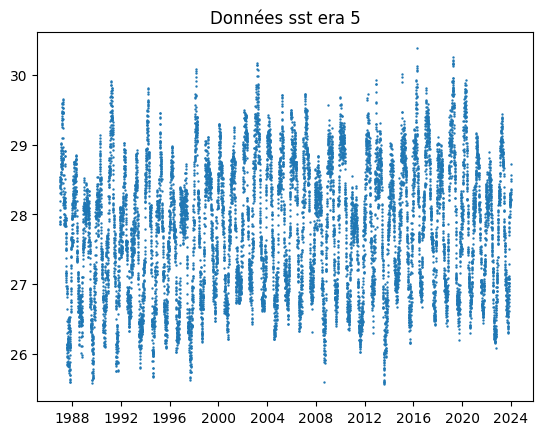

In [4]:
plt.scatter(sst_era5_day['DateTime'], sst_era5_day['sst'], s=.5)
plt.title('Données sst era 5')

In [5]:
temp = pd.read_csv('Thermographe/p8-tiahura.csv', sep= ';')
temp['DateTime'] = temp['DateTime'].astype('datetime64')
temp['°C'] = pd.to_numeric(temp['°C'].str.replace(',', '.'))
temp = temp.rename(columns={'°C': 'Temperature'})
temp_2016 = temp[temp['DateTime'].dt.year >=2016]
temp_2016 = temp_2016.sort_values(by = 'DateTime')
temp_2016['DateTime'] = temp_2016['DateTime'].dt.date
temp_2016['DateTime'] = temp_2016['DateTime'].astype('datetime64[ns]')
temp_2016 = temp_2016.reset_index()
temp_2016 = temp_2016.drop(columns='index')
temp_2016

,DateTime,Temperature
0,2016-01-01,28.5
1,2016-01-02,28.5
2,2016-01-03,28.3
3,2016-01-04,28.4
4,2016-01-05,28.2
...,...,...
2792,2023-08-24,26.9
2793,2023-08-25,26.8
2794,2023-08-26,26.8
2795,2023-08-27,26.8


In [6]:
sst_era5_day_2016 = sst_era5_day_2016[(sst_era5_day_2016['DateTime'] >= pd.to_datetime('2016-01-01'))&(sst_era5_day_2016['DateTime'] <= pd.to_datetime('2023-08-28	'))]

Text(0.5, 1.0, 'Température sonde/era 5 par jour')

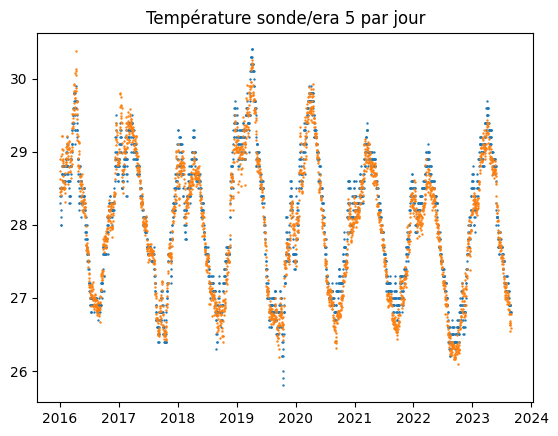

In [7]:
plt.scatter(temp_2016['DateTime'], temp_2016['Temperature'], s = .5)
plt.scatter(sst_era5_day_2016['DateTime'], sst_era5_day_2016['sst'], s=.5)
plt.title('Température sonde/era 5 par jour')

In [8]:
print("r2 :", metrics.r2_score(np.array(temp_2016['Temperature']), sst_era5_day_2016['sst']))
print("mse :", metrics.mean_squared_error(np.array(temp_2016['Temperature']), sst_era5_day_2016['sst']))

r2 : 0.9365484112069331
mse : 0.052339672423099684


## Regression convolution

In [9]:
len_train = 2500
r = 15
N = 2797 
X_train = np.ones((len_train, (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X_train[:, j] = np.roll(sst_era5_day_2016['sst'].iloc[:len_train], r - j)

Y = np.array(temp_2016['Temperature'].iloc[:len_train]).reshape(-1, 1)
Y.shape

X_test = np.ones((N - len_train, (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X_test[:, j] = np.roll(sst_era5_day_2016['sst'].iloc[len_train:N], r - j)


In [11]:
h, residuals, _, _ = np.linalg.lstsq(X_train, Y, rcond=None)
print("r2 :", metrics.r2_score(np.array(temp_2016['Temperature'].loc[len_train:N]), np.dot(X_test, h)))
print("mse :", metrics.mean_squared_error(np.array(temp_2016['Temperature'].loc[len_train:N]), np.dot(X_test, h)))

r2 : 0.9456675403214722
mse : 0.03906291286047698


Text(0.5, 1.0, 'Température sonde/era 5 par jour')

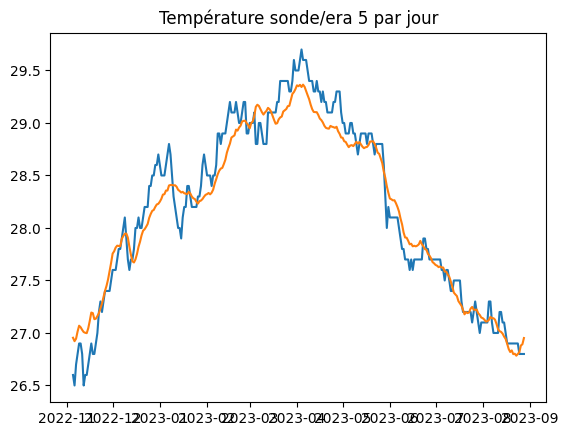

In [12]:
plt.plot(temp_2016['DateTime'].loc[len_train:], temp_2016['Temperature'].loc[len_train:])
plt.plot(sst_era5_day_2016['DateTime'].iloc[len_train:temp_2016.shape[0]], np.dot(X_test, h))
plt.title('Température sonde/era 5 par jour')

## Création Dataframe (1987 - 2023)

In [13]:
X = np.ones((sst_era5_day.shape[0], (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X[:, j] = np.roll(sst_era5_day['sst'], r - j)

In [14]:
sst_era5_adjusted = pd.concat([sst_era5_day, pd.DataFrame(np.dot(X, h))], axis = 1)
sst_era5_adjusted = sst_era5_adjusted.drop(columns='sst')
sst_era5_adjusted = sst_era5_adjusted.rename(columns = {0:'sst'})
sst_era5_adjusted

,DateTime,sst
0,1987-01-01,28.076666
1,1987-01-02,28.034892
2,1987-01-03,28.042426
3,1987-01-04,28.041670
4,1987-01-05,28.101721
...,...,...
13509,2023-12-27,28.355878
13510,2023-12-28,28.388756
13511,2023-12-29,28.390780
13512,2023-12-30,28.332722


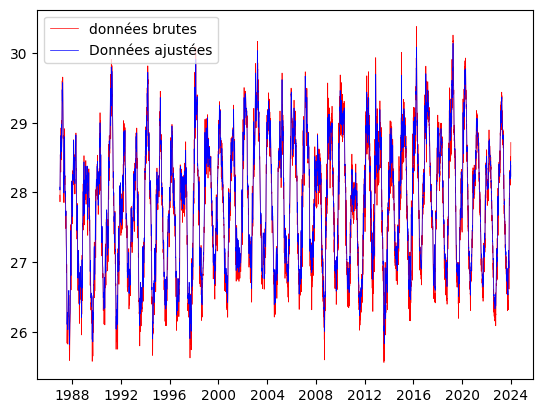

In [15]:
plt.plot(sst_era5_day['DateTime'], sst_era5_day['sst'], color = 'r', label = 'données brutes', linewidth = .5)
plt.plot(sst_era5_adjusted['DateTime'], sst_era5_adjusted['sst'], color = 'b', label = 'Données ajustées', linewidth = .5)
plt.legend()

## Gap filling p8

In [16]:
temp = pd.read_csv('Thermographe/p8-tiahura.csv', sep= ';')
temp['DateTime'] = temp['DateTime'].astype('datetime64')
temp['°C'] = pd.to_numeric(temp['°C'].str.replace(',', '.'))
temp = temp.rename(columns={'°C': 'Temperature'})
temp = temp.sort_values(by = 'DateTime')
temp['DateTime'] = temp['DateTime'].dt.date
temp['DateTime'] = temp['DateTime'].astype('datetime64[ns]')
temp = temp.reset_index()
temp = temp.drop(columns='index')

Text(0.5, 1.0, 'Température p8 brut')

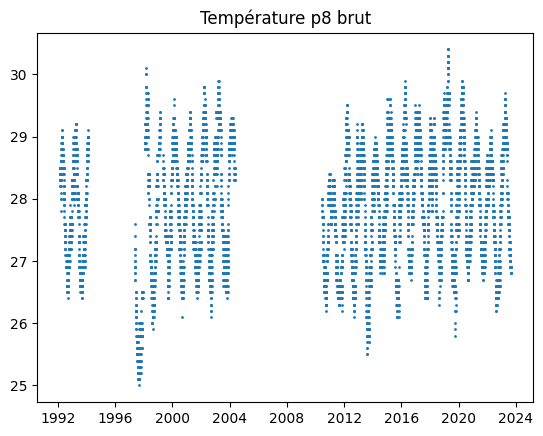

In [17]:
plt.scatter(temp['DateTime'], temp['Temperature'], s = 1)
plt.title('Température p8 brut')

In [18]:
# Définir la colonne date comme index dans les deux DataFrames
temp.set_index('DateTime', inplace=True)
sst_era5_day.set_index('DateTime', inplace=True)

# Fusionner les deux DataFrames en utilisant la méthode 'outer' pour inclure toutes les dates de 'df_temp' et 'df_autre'
fill_sst = pd.merge(temp, sst_era5_day, left_index=True, right_index=True, how='outer')

# Remplir les valeurs manquantes de température avec les valeurs existantes de 'df_autre'
fill_sst['sst'] = fill_sst['Temperature'].fillna(fill_sst['sst'])

# Réinitialiser l'index pour avoir une colonne date
fill_sst.reset_index(inplace=True)
fill_sst = fill_sst.drop(columns='Temperature')
fill_sst = fill_sst.rename(columns={'sst':'Temperature'})


### Résultat

Text(0.5, 1.0, 'Température p8 brut')

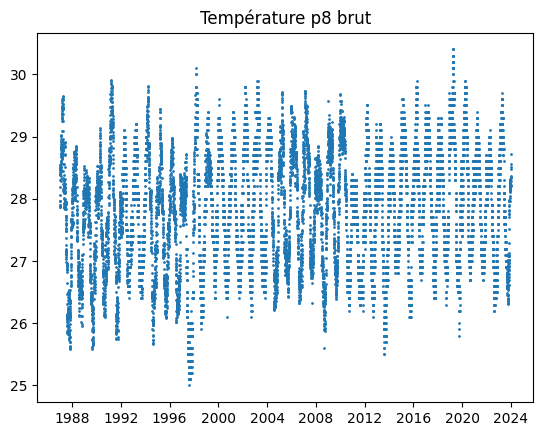

In [19]:
plt.scatter(fill_sst['DateTime'], fill_sst['Temperature'], s = 1)
plt.title('Température p8 brut')

## MMM & DHW

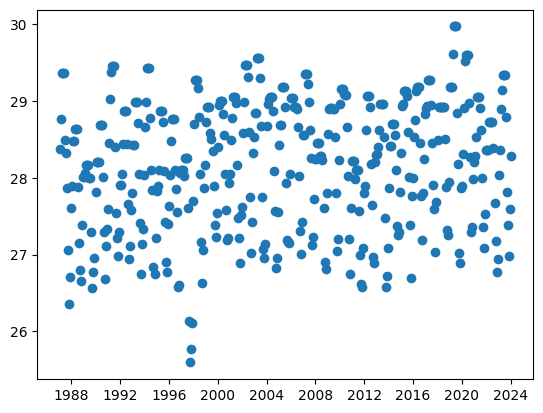

In [20]:
# accumulation window = 3 mois
monthly_means = fill_sst.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means['MMM'] = monthly_means['Temperature'].rolling(window=3, min_periods=1).max()
plt.scatter(monthly_means['DateTime'], monthly_means['MMM'])

In [21]:
monthly_means['Mois'] = monthly_means['DateTime'].dt.to_period('M')
fill_sst['Mois'] = fill_sst['DateTime'].dt.to_period('M')
fill_sst = pd.merge(fill_sst, monthly_means[['Mois', 'MMM']], on='Mois', how='left')
fill_sst.drop(columns='Mois', inplace = True)
fill_sst

,DateTime,Temperature,MMM
0,1987-01-01,27.961418,28.372055
1,1987-01-02,27.900248,28.372055
2,1987-01-03,27.866877,28.372055
3,1987-01-04,27.866562,28.372055
4,1987-01-05,27.898460,28.372055
...,...,...,...
13509,2023-12-27,28.291138,28.281270
13510,2023-12-28,28.225121,28.281270
13511,2023-12-29,28.480257,28.281270
13512,2023-12-30,28.564737,28.281270


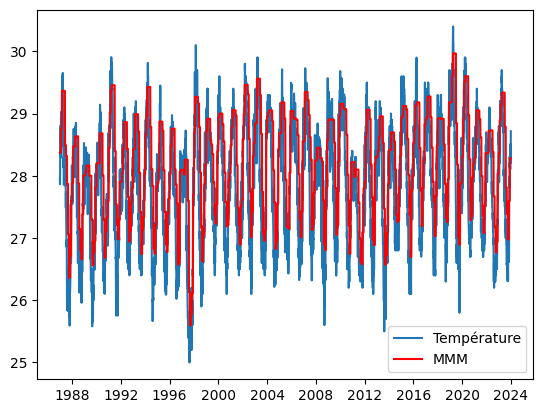

In [22]:
plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Température')
plt.plot(fill_sst['DateTime'], fill_sst['MMM'], color = 'r', label = 'MMM')
plt.legend()

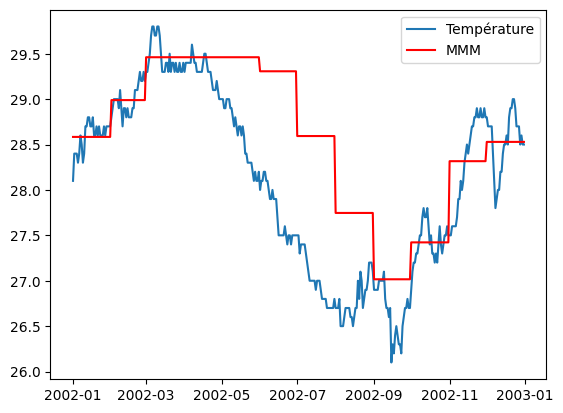

In [23]:
plt.plot(fill_sst['DateTime'][fill_sst['DateTime'].dt.year == 2002], fill_sst['Temperature'][fill_sst['DateTime'].dt.year == 2002], label = 'Température')
plt.plot(fill_sst['DateTime'][fill_sst['DateTime'].dt.year == 2002], fill_sst['MMM'][fill_sst['DateTime'].dt.year == 2002], color = 'r', label = 'MMM')
plt.legend()

In [24]:
fill_sst['hotspot / 7'] = (fill_sst['Temperature'] - fill_sst['MMM'])/7
fill_sst['hotspot / 7'][fill_sst['hotspot / 7'] < 0] = 0
fill_sst

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_5357/3156963057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['hotspot / 7'][fill_sst['hotspot / 7'] < 0] = 0


,DateTime,Temperature,MMM,hotspot / 7
0,1987-01-01,27.961418,28.372055,0.000000
1,1987-01-02,27.900248,28.372055,0.000000
2,1987-01-03,27.866877,28.372055,0.000000
3,1987-01-04,27.866562,28.372055,0.000000
4,1987-01-05,27.898460,28.372055,0.000000
...,...,...,...,...
13509,2023-12-27,28.291138,28.281270,0.001410
13510,2023-12-28,28.225121,28.281270,0.000000
13511,2023-12-29,28.480257,28.281270,0.028427
13512,2023-12-30,28.564737,28.281270,0.040495


In [25]:
fill_sst = fill_sst.loc[91:]
fill_sst['dhw'] = fill_sst['hotspot / 7'].rolling(window=90, min_periods=1).sum()
fill_sst = fill_sst.drop(columns='hotspot / 7')

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_5357/3822555485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['dhw'] = fill_sst['hotspot / 7'].rolling(window=90, min_periods=1).sum()


Text(0.5, 1.0, 'Degree Heating Week')

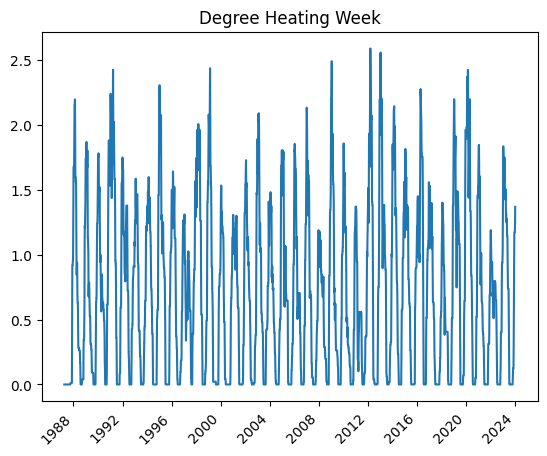

In [26]:
plt.plot(fill_sst['DateTime'], fill_sst['dhw'])
plt.xticks(rotation=45, ha='right')
plt.title('Degree Heating Week')

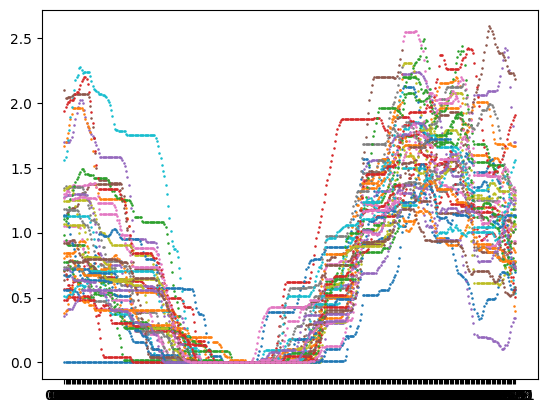

In [27]:
fill_sst['date'] = fill_sst['DateTime'].dt.strftime('%m-%d')
fill_sst['Annee'] = fill_sst['DateTime'].dt.year

# Plot data for each year
for annee in fill_sst['Annee'].unique():
    data_annee = fill_sst[fill_sst['Annee'] == annee]
    plt.scatter(data_annee['date'], data_annee['dhw'], label=str(annee), s = .7)

fill_sst = fill_sst.drop(columns=['Annee', 'date'])

## Acute thermal stress

In [28]:
threshold = 1
fill_sst['excess'] = fill_sst.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
fill_sst['excess'] = fill_sst['excess'].rolling(window = 90, min_periods= 90).sum()
fill_sst['Acute thermal stress'] = fill_sst.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
fill_sst.drop(columns='excess', inplace = True)
fill_sst

,DateTime,Temperature,MMM,dhw,Acute thermal stress
91,1987-04-02,29.246286,29.366008,0.000000,0
92,1987-04-03,29.090403,29.366008,0.000000,0
93,1987-04-04,28.961128,29.366008,0.000000,0
94,1987-04-05,28.906296,29.366008,0.000000,0
95,1987-04-06,28.887873,29.366008,0.000000,0
...,...,...,...,...,...
13509,2023-12-27,28.291138,28.281270,1.236741,0
13510,2023-12-28,28.225121,28.281270,1.236741,0
13511,2023-12-29,28.480257,28.281270,1.265168,0
13512,2023-12-30,28.564737,28.281270,1.305663,0


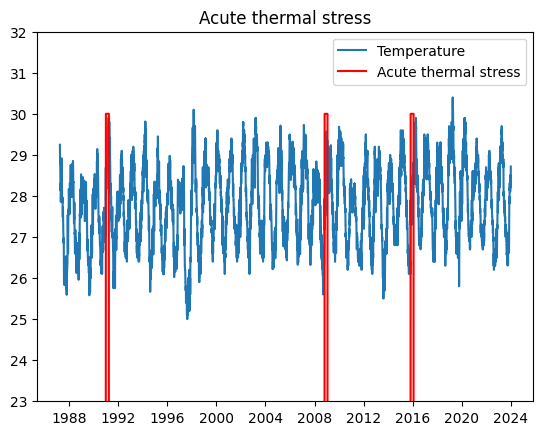

In [29]:
plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Temperature')
plt.plot(fill_sst['DateTime'], fill_sst['Acute thermal stress']*30, color = 'r', label = 'Acute thermal stress')
plt.title('Acute thermal stress')
plt.ylim(23, 32)
plt.legend()

## Thermal trajectory

In [30]:
threshold = 1

fill_sst['thermal_stress_category'] = ''

for i in range(fill_sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(fill_sst['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > fill_sst['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > fill_sst['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        fill_sst['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        fill_sst['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if fill_sst['Temperature'].iloc[i-10] >= fill_sst['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        fill_sst['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(fill_sst['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > fill_sst['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        fill_sst['thermal_stress_category'].iloc[i] = 0
    
    if fill_sst['thermal_stress_category'].iloc[i] == '':
        fill_sst['thermal_stress_category'].iloc[i] = 0.5

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_5357/1777632503.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['thermal_stress_category'].iloc[i] = 0
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_5357/1777632503.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['thermal_stress_category'].iloc[i] = 2
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_5357/1777632503.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

Text(0, 0.5, 'Temperature')

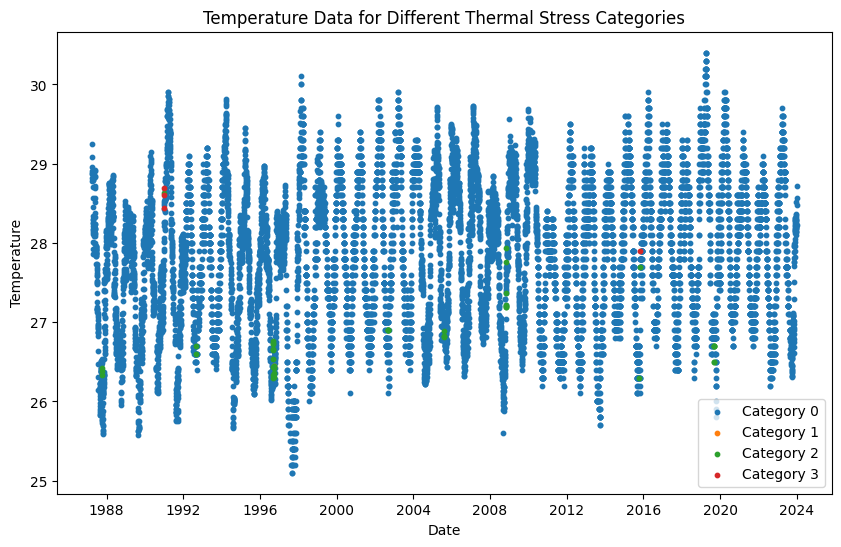

In [31]:
plt.figure(figsize=(10, 6))

for category in range(4):
    category_data = fill_sst[fill_sst['thermal_stress_category'] == category]
    plt.scatter(category_data['DateTime'], category_data['Temperature'], label=f'Category {category}', s = 10)

plt.legend()
plt.title('Temperature Data for Different Thermal Stress Categories')
plt.xlabel('Date')
plt.ylabel('Temperature')

## Données météo

In [32]:
chemin_fichier_nc = 'era 5/significant height of wind waves and swell (2016 2023) .nc'

ds = xr.open_dataset(chemin_fichier_nc)

waves = ds.to_dataframe()
waves = waves.reset_index()
waves = waves[(waves['latitude'] == -17)&(waves['longitude'] == -150)]
waves.drop(columns=['expver', 'latitude', 'longitude'], inplace = True)
waves = waves.rename(columns={'time': 'DateTime', 'swh':'height'})
waves_day_2016 = waves.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Significant height of combined wind waves and swell (2003 2015).nc'

ds = xr.open_dataset(chemin_fichier_nc)

waves = ds.to_dataframe()
waves = waves.reset_index()
waves = waves[(waves['latitude'] == -17)&(waves['longitude'] == -150)]
waves.drop(columns=['latitude', 'longitude'], inplace = True)
waves = waves.rename(columns={'time': 'DateTime', 'swh':'height'})
waves_day_2003 = waves.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Significant height of combined wind waves and swell (1999 2002).nc'

ds = xr.open_dataset(chemin_fichier_nc)

waves = ds.to_dataframe()
waves = waves.reset_index()
waves = waves[(waves['latitude'] == -17)&(waves['longitude'] == -150)]
waves.drop(columns=['latitude', 'longitude'], inplace = True)
waves = waves.rename(columns={'time': 'DateTime', 'swh':'height'})
waves_day_1999 = waves.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Significant height of combined wind waves and swell (1987 1999).nc'

ds = xr.open_dataset(chemin_fichier_nc)

waves = ds.to_dataframe()
waves = waves.reset_index()
waves = waves[(waves['latitude'] == -17)&(waves['longitude'] == -150)]
waves.drop(columns=['latitude', 'longitude'], inplace = True)
waves = waves.rename(columns={'time': 'DateTime', 'swh':'height'})
waves_day_1987 = waves.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

waves_day = pd.concat([waves_day_1987, waves_day_1999], axis = 0)
waves_day = pd.concat([waves_day, waves_day_2003], axis = 0)
waves_day = pd.concat([waves_day, waves_day_2016], axis = 0)
waves_day = waves_day[['DateTime', 'height']]
waves_day = waves_day.reset_index().drop(columns='index')

In [33]:
chemin_fichier_nc = 'era 5/Surface net solar radiation (2003 2015).nc'

ds = xr.open_dataset(chemin_fichier_nc)

radiation = ds.to_dataframe()
radiation = radiation.reset_index()
radiation = radiation[(radiation['latitude'] == -17)&(radiation['longitude'] == -150)]
radiation.drop(columns=['latitude', 'longitude'], inplace = True)
radiation = radiation.rename(columns={'time': 'DateTime'})
radiation_day_2003 = radiation.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Surface net solar radiation (2003 2015).nc'

ds = xr.open_dataset(chemin_fichier_nc)

radiation = ds.to_dataframe()
radiation = radiation.reset_index()
radiation = radiation[(radiation['latitude'] == -17)&(radiation['longitude'] == -150)]
radiation.drop(columns=['latitude', 'longitude'], inplace = True)
radiation = radiation.rename(columns={'time': 'DateTime'})
radiation_day_2003 = radiation.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Surface net solar radiation (2016 2023).nc'

ds = xr.open_dataset(chemin_fichier_nc)

radiation = ds.to_dataframe()
radiation = radiation.reset_index()
radiation = radiation[(radiation['latitude'] == -17)&(radiation['longitude'] == -150)]
radiation.drop(columns=['latitude', 'longitude'], inplace = True)
radiation = radiation.rename(columns={'time': 'DateTime'})
radiation_day_2016 = radiation.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Surface net solar radiation (1999 2002).nc'

ds = xr.open_dataset(chemin_fichier_nc)

radiation = ds.to_dataframe()
radiation = radiation.reset_index()
radiation = radiation[(radiation['latitude'] == -17)&(radiation['longitude'] == -150)]
radiation.drop(columns=['latitude', 'longitude'], inplace = True)
radiation = radiation.rename(columns={'time': 'DateTime'})
radiation_day_1999 = radiation.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

chemin_fichier_nc = 'era 5/Surface net solar radiation (1987 1999).nc'

ds = xr.open_dataset(chemin_fichier_nc)

radiation = ds.to_dataframe()
radiation = radiation.reset_index()
radiation = radiation[(radiation['latitude'] == -17)&(radiation['longitude'] == -150)]
radiation.drop(columns=['latitude', 'longitude'], inplace = True)
radiation = radiation.rename(columns={'time': 'DateTime'})
radiation_day_1987 = radiation.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()

radiation_day = pd.concat([radiation_day_1987, radiation_day_1999], axis = 0)
radiation_day = pd.concat([radiation_day, radiation_day_2003], axis = 0)
radiation_day = pd.concat([radiation_day, radiation_day_2016], axis = 0)
radiation_day = radiation_day[['DateTime', 'ssr']]
radiation_day = radiation_day.reset_index().drop(columns='index')

## Multiparamètres

In [34]:
multiparamètres = pd.merge(fill_sst, waves_day, on = 'DateTime', how = 'inner')
multiparamètres = pd.merge(multiparamètres, radiation_day, on = 'DateTime', how = 'inner')
multiparamètres = multiparamètres.rename(columns={'ssr':'solar irradiance', 'height':'wave height'})
multiparamètres

,DateTime,Temperature,MMM,dhw,Acute thermal stress,thermal_stress_category,wave height,solar irradiance
0,1987-04-02,29.246286,29.366008,0.000000,0,0,2.078529,4.710458e+05
1,1987-04-03,29.090403,29.366008,0.000000,0,0,1.933462,6.095557e+05
2,1987-04-04,28.961128,29.366008,0.000000,0,0,2.082366,9.048491e+05
3,1987-04-05,28.906296,29.366008,0.000000,0,0,2.136733,8.611613e+05
4,1987-04-06,28.887873,29.366008,0.000000,0,0,2.146025,8.072412e+05
...,...,...,...,...,...,...,...,...
13418,2023-12-27,28.291138,28.281270,1.236741,0,0,1.941494,9.612449e+05
13419,2023-12-28,28.225121,28.281270,1.236741,0,0,1.883384,9.623133e+05
13420,2023-12-29,28.480257,28.281270,1.265168,0,0,1.618348,8.400169e+05
13421,2023-12-30,28.564737,28.281270,1.305663,0,0,1.516970,1.042193e+06
